# Kaggle House Prices

## Imports

In [29]:
# Data analysis
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

# Visualization
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.ensemble import RandomForestRegressor

# Processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Other
from collections import OrderedDict
import math
from ipywidgets import widgets

## Read the Data
Read the data using pandas read_csv

In [30]:
testData  = pd.read_csv("data/test.csv")
trainData = pd.read_csv("data/train.csv")

## General workflow goals
**Classifying** - We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating** - One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting** - For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing** - Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting** - We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating** - Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting** - How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## Initial investigation of data

In [31]:
print(trainData.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [32]:
print(trainData.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [33]:
trainData.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [34]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
trainData.describe(include=['O']) #Only include object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [36]:
trainData.describe(include=[np.number]) #Only include numbers

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Conclusion
- PoolQC has only 7 entries
- MiscFeature only has 54 entries
- Alley has only 91 entires 
- Fence only has 281 entries 
- FireplaceQu only has 770 entries

-> Guess this is because N/A has been selected

- Mean sell price is 180'921 $
- Most houses sold by middle of 2008
- Mean LotArea is 10516.828082 sqFeet


**Classifying** - See which features mostly correlates to sale price. Check early and compare with end result.

**Correlating** - One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting** - For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing** - Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting** - We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating** - Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting** - How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## Pivot features

In [37]:
#Function to check the pivot of a perticular feature compared to sale price
def checkPivot(data, feuature):
    return data[[feuature, 'SalePrice']].groupby([feuature], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

In [38]:
filterFeatures = False

#Check all categorical features to see which mostly correlates to a difference in sale price
def var(feature):
    data = checkPivot(trainData, feature)
    maxPrize = data['SalePrice'].max()
    minPrize = data['SalePrice'].min()
    return maxPrize/minPrize

varThreshold = 2

catData = trainData.select_dtypes(include='object')
featureList = [x for x in catData.columns]
varDict = {}

for f in featureList:
    variance = var(f)
    if not filterFeatures:
        varThreshold = 0
    if variance > varThreshold:
        varDict[f] = variance

importantFeatures = list(varDict)
feat = OrderedDict(sorted(varDict.items(), key=lambda x: x[1], reverse=True))
print(feat)
print(importantFeatures)

OrderedDict([('ExterQual', 4.175257905783246), ('Exterior1st', 3.6901408450704225), ('Neighborhood', 3.4013727116863004), ('Condition2', 3.3591731266149871), ('BsmtCond', 3.3374985576923075), ('KitchenQual', 3.1123386687969981), ('Exterior2nd', 3.038095238095238), ('MSZoning', 2.8715927106384385), ('RoofMatl', 2.8485401459854014), ('BsmtQual', 2.8268243314654824), ('Electrical', 2.7884345252746758), ('MiscFeature', 2.6595744680851063), ('ExterCond', 2.6318082788671027), ('SaleCondition', 2.6150468379351737), ('FireplaceQu', 2.6025100152854237), ('Heating', 2.5106371776296723), ('HeatingQC', 2.4702807948252592), ('PoolQC', 2.4258626664686371), ('GarageQual', 2.4059900166389352), ('GarageType', 2.3167228790192107), ('SaleType', 2.2940794162101534), ('Functional', 2.1378688468394351), ('Foundation', 2.0977891391233037), ('HouseStyle', 1.9972764412165229), ('MasVnrType', 1.8151116335143846), ('CentralAir', 1.7687583557583488), ('GarageCond', 1.7316657630794254), ('GarageFinish', 1.68865173

### Listing the pivot of the top 5 most corrolated features
1. ExterQual
2. Exterior1st
3. Neighborhood
4. Condition2
5. BsmtCond

In [39]:
# Check type of HouseStyle
checkPivot(trainData, 'ExterQual')

,ExterQual,SalePrice
0,Ex,367360.961538
2,Gd,231633.510246
3,TA,144341.313466
1,Fa,87985.214286


In [40]:
#Check MSSubClass
checkPivot(trainData, 'Exterior1st')

,Exterior1st,SalePrice
7,ImStucc,262000.000000
10,Stone,258500.000000
5,CemntBd,231690.655738
12,VinylSd,213732.900971
3,BrkFace,194573.000000
9,Plywood,175942.379630
6,HdBoard,163077.450450
11,Stucco,162990.000000
14,WdShing,150655.076923
13,Wd Sdng,149841.645631


In [41]:
#Check Neighborhood
checkPivot(trainData, 'Neighborhood')

,Neighborhood,SalePrice
15,NoRidge,335295.317073
16,NridgHt,316270.623377
22,StoneBr,310499.000000
23,Timber,242247.447368
24,Veenker,238772.727273
21,Somerst,225379.837209
4,ClearCr,212565.428571
6,Crawfor,210624.725490
5,CollgCr,197965.773333
0,Blmngtn,194870.882353


In [42]:
# Check pivit of having central ac vs not
checkPivot(trainData, 'Condition2')

,Condition2,SalePrice
3,PosA,325000.000000
4,PosN,284875.000000
5,RRAe,190000.000000
2,Norm,181169.405536
6,RRAn,136905.000000
1,Feedr,121166.666667
0,Artery,106500.000000
7,RRNn,96750.000000


In [43]:
# Check pivit of having a good pool
checkPivot(trainData, 'BsmtCond')

,BsmtCond,SalePrice
1,Gd,213599.907692
3,TA,183632.620900
0,Fa,121809.533333
2,Po,64000.000000


### Analyzing continous features

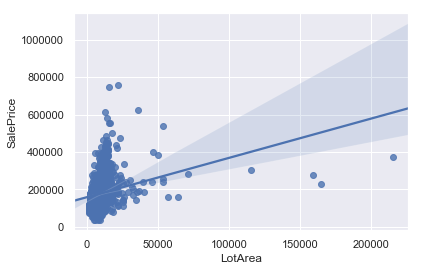

In [44]:
ax = sns.regplot(x="LotArea", y="SalePrice", data=trainData)

## Creating model


In [45]:
#How to remove NaNs
# GarageYrBlt      MasVnrArea       LotFrontage 
meanYr = math.ceil(trainData["GarageYrBlt"].mean())
print("Mean: " , meanYr)

numNullPre = trainData["GarageYrBlt"].isnull().sum().sum()
trainData["GarageYrBlt"].fillna(meanYr,inplace=True)
numNullPost = trainData["GarageYrBlt"].isnull().sum().sum()

print("Number of NaN pre:", numNullPre)
print("Number of NaN post:", numNullPost)

Mean:  1979
Number of NaN pre: 81
Number of NaN post: 0


In [46]:
#Coefficients for random forest regressor
max_depth = 10
random_state = 0
n_estimators = 500

#### Data processing

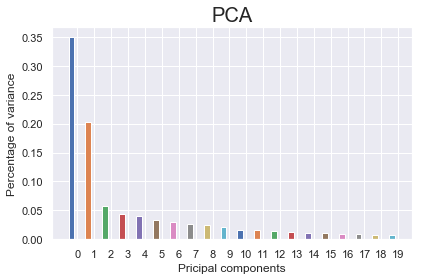

In [75]:
#Pre processing of data
#def processData(dataset, featureList, trainSize=0.8, isTraining=True):
  #  X_train = []
  #  X_test  = []
  #  y_train = []
    #y_test  = []
    
    # Split up data set
    
    
    # Assign X and y data
if "SalePrice" in trainData.columns:
    y_train = trainData["SalePrice"]
    X_train = trainData.drop("SalePrice", axis = 1)
X_train = trainData[featureList].copy()

# Convert to numerical values
for f in featureList:
    X_train[f] = X_train[f].astype('category')
cat_columns = X_train.select_dtypes(['category']).columns
X_train[cat_columns] = X_train[cat_columns].apply(lambda x: x.cat.codes)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
#X_test_scaled  = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

# Use Principle Component Analysis
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))

pcaList = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.set_xlabel('Pricipal components')
ax.set_ylabel('Percentage of variance')
ax.set_title('PCA', fontsize=20)

validPCAs = len(pcaList)
validPCAs = 20
bar_width = 0.35

index = np.arange(validPCAs)

ax.set_xticks(index + bar_width)
ax.set_xticklabels(index)

for i in range(validPCAs):
    ax.bar(i, pcaList[i], bar_width)

fig.tight_layout()
plt.show()

# pca = PCA(n_components=2)
# principalComp = pca.fit_transform(X_train)
# PCdf = pd.DataFrame(data=principalComp, columns= ['comp1', 'comp2'])
# print(PCdf)



#x_axis = np.arange(1, pca.n_components_+1)
#pca_scaled = PCA()
#pca_scaled.fit(X_train_scaled)
#cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

#print(X_train_scaled)


    #Example of how to convert categories to numerical
    #for dataset in combine:
    #   dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

       
   
    
    #return X_train, X_test, y_train, y_test

#X_train, X_test, y_train, y_test = processData(trainData, importantFeatures)

#X_train


#### Model

In [48]:
def randomForestModel(X_train, Y_train):
        
    regr = RandomForestRegressor(oob_score=True, random_state=random_state, n_estimators=n_estimators)
    regr.fit(X_train, Y_train)
    
    return regr


In [49]:
#featureList = ["ExterCond", "Functional", "BsmtCond", "GarageType", "Condition2", "GarageQual"]

X_train, X_test, y_train, y_test = processData(trainData, importantFeatures, isTraining = True)
#regr = randomForestModel(X_train, Y_train)

round(regr.score(X_train, Y_train) * 100, 2)

c:\python\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


NameError: name 'regr' is not defined

In [ ]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(regr.feature_importances_)

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
#X_test, Y_test = processData(testData, importantFeatures)
#print(regr.predict(X_test))

# Testing widget

In [ ]:
outputText = widgets.Text()
outputText

In [ ]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()

inputText.on_submit(makeUpperCase)
inputText